# _Python for Scientific Data Analysis_

_**caveat**_: _It is impossible to cover Machine Learning in just one lecture or even a few weeks: this deserves its own course (which might happen!).  And there are great resources for learning about Machine Learning on your own.  This super-brief introduction will leverage very heavily on these two great sources: Section 5 of the "Python Data Science Handbook" by van der Plas and "Machine Learning for Physics and Astronomy" by Acquaviva._

#    (a very brief and gentle) Introduction to Machine Learning
## Section 1: Getting Started
### What is Machine Learning?

_**Machine learning**_ is the process of teaching a "machine" (er, program) to make informed data-driven decisions by building mathematical models to help understand data. The "learning" part happens when we give these models tunable parameters that can be adapted to observed data; in this way the program can be considered to be "learning" from the data. Once these models have been fit to previously seen data (i.e. "trained"), they can be used to predict and understand aspects of newly observed data.

## Python Packages for Machine Learning

If you ask Google to name "Python packages for machine learning", the results are a bit confusing as it names things we have already covered (Matplotlib, NumPy, SciPy, etc.) and some things we haven't covered but are not really machine learning packages either (Pandas, OpenCV).  

There are a couple of machine learning-specific packages you should know about:

* **Scikit-Learn**: developed in 2007 and built on top of (well integrated with) Matplolib, NumPy, and SciPy (i.e. packages we already covered in class.   It includes various classification, regression and clustering algorithms including support-vector machines, random forests, gradient boosting, k-means and DBSCAN (don't worry about what these mean for now).

  If it isn't already installed from your Anaconda Python distribution, you can install it through pip

  ``
  pip install scikit-learn
  ``

  This is the primary ML package we will be using in this lecture.

 * **PyTorch**: originally developed by Facebook (er, Meta) in 2016 and used by other organizations/businesses.    Billed as working especially well with GPU acceleration and utilizing deep neural networks.

   installation: ``pip install torch torchvision``

 * **Tensor Flow**: developed by Google in 2015.  Primarily used for neural networks and deep learning.

   installation: ``pip install tensorflow``

## Different Machine Learning Approaches

Fundamentally, machine learning can be divided into two different approaches: supervised learning and unsupervised learning.

1. **Supervised learning**:  Models that can predict labels based on labeled training data.   You model the relationship between measured features of data and some label associated with the data.  After constructing your model, you then use it to apply labels to new, unknown data.  Supervised learning is further subdivided into _classification_ and _regression_ :

 * _Classification_: Models that predict labels as two or more discrete categories.   E.g. you have some data and they are labeled either "red", "blue", or "green" (only three categories).  You then construct a model based on data where the red/blue/green label is given and apply this "trained" model to unlabeled data.

 * _Regression_: Models that predict continuous labels.   E.g. pretend for a second that you forgot Newton's law of gravitation.  You drop a bunch of heavy balls from different heights and devise a relationship between the height dropped and the time taken for the balls to height the ground.  Here, the prediction of your ML model is not binary: we ask how close the model is to the correct answer.  E.g. if the correct answer for the time needed for the ball to fall is 4.45 seconds, a model that predicts 4.5 seconds gives a very different result from one that predicts 45 seconds.
   
2. **Unsupervised learning**: Models that identify structure in unlabeled data


 * _Clustering_: Models that detect and identify distinct groups in the data.   E.g. if you were wanting to count how many friends appear in your Facebook photos, a successful clustering algorithm would group together all instances of the same person, so that you can count the number of occurrences.  This can be done without knowing anything about the identity of the individuals beforehand (i.e. without labeling, without _supervision_).
   
 * _Dimensionality reduction_: Models that detect and identify lower-dimensional structure in higher-dimensional data.  Dimensionality reduction works in one of three ways.  1) retaining the original image features and just selecting those that are expected to be the most meaningful.  2) remapping the feature space to a different one where fewer compoennts can express the highest amount of variance of the original data. 3) learning a _manifold_ -- a nonlinear space in which some interesting properties of the data set (e.g. pairwise distances or dot products between elements) are preserved.

   Clustering and dimensionality reduction can be used in tandem: e.g. dimensionality reduction as a preprocessing step for clustering algorithms.
   

    Similarly, there are so-called _semi-supervised_ learning methods, which fall somewhere between supervised learning and unsupervised learning. Semi-supervised learning methods are often useful when only incomplete labels are available.

## Super-Simple Examples of Machine Learning 

Let's learn by example.  Below are very simple examples of a machine learning task. These examples are meant to give an intuitive, non-quantitative overview of the types of machine learning tasks: supervised learning (classification, regression) and unsupervised learning (clustering, dimensionality reduction).


### Supervised Learning: Classification

You are given a set of labeled points and want to use these to classify some unlabeled points.

First, let's generate some fake data.  The details of _how_ we generate these data leverages on something called a "support vector machine" and is unimportant right now.  Just know that we are creating mock data to illustrate concepts.

Imagine that we have the data shown in this figure:

In [187]:
#note: the import commands for make_blobs may have changed from the van der Plas textbook!


#per standard
import matplotlib.pyplot as plt
import numpy as np

#Scikit-Learn import commands
from sklearn.datasets._samples_generator import make_blobs



In [188]:
#make_blobs = just make up some clustered data to demonstrate the principle of ML

X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)

#here, X is a stand in for an x-y coordinate pair




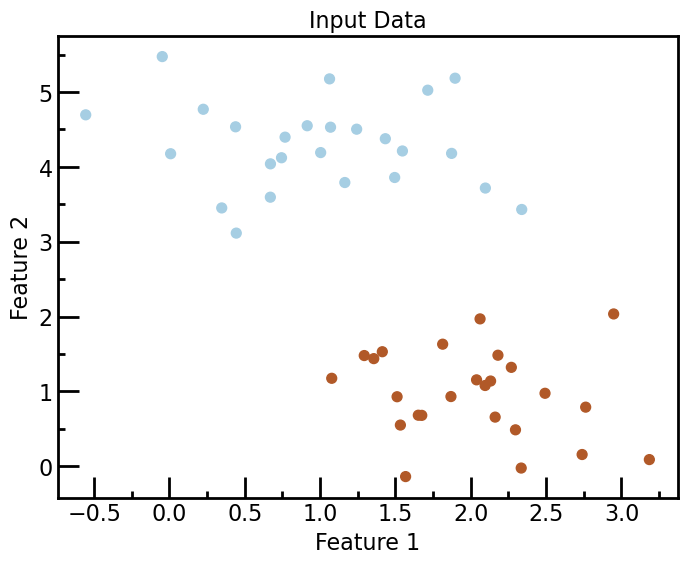

In [189]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import AutoMinorLocator

# plot the data
fig, ax = plt.subplots(figsize=(8, 6))
point_style = dict(cmap='Paired', s=50)

title='Input Data'
ax.scatter(X[:, 0], X[:, 1], c=y, **point_style)
#ax.xaxis.set_major_formatter(plt.NullFormatter())
#ax.yaxis.set_major_formatter(plt.NullFormatter())
ax.set_xlabel('Feature 1',fontsize=16)
ax.set_ylabel('Feature 2',fontsize=16)
ax.tick_params(which='major',direction='in',width=2,length=15,labelsize=16)
ax.tick_params(which='minor',direction='in',width=2,length=5,labelsize=16)
ax.xaxis.set_minor_locator(AutoMinorLocator(2))
ax.yaxis.set_minor_locator(AutoMinorLocator(2))
ax.set_title(title,fontsize=16)
for axl in ['top','bottom','left','right']:
 ax.spines[axl].set_linewidth(2)

# format plot
#format_plot(ax, 'Input Data')
#ax.axis([-1, 4, -2, 7])     

Each point has two features: an "x" feature and a "y" feature, constituting two-dimensional data.   Additionally, each point has one of two labels denoted by color: a "blue" label and a "red" label.  From these features and labels, we would like to create a model that will let us decide whether a new point should be labeled "blue" or "red."

There are a number of possible models for such a classification task, but here we will use an extremely simple one. We will make the assumption that the two groups can be separated by drawing a straight line through the plane between them, such that points on each side of the line fall in the same group. Here the model is a quantitative version of the statement "a straight line separates the classes", while the model parameters are the particular numbers describing the location and orientation of that line for our data. The optimal values for these model parameters are learned from the data (this is the "learning" in machine learning), which is often called training the model.

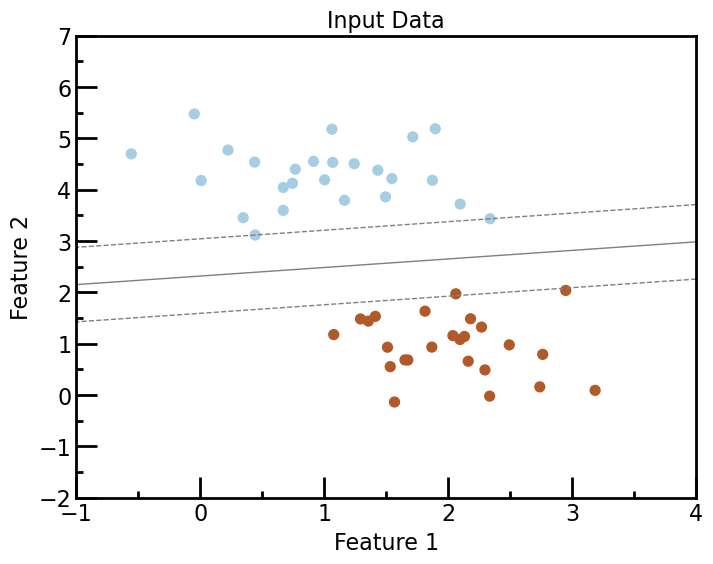

In [190]:
# fit the support vector classifier model
from sklearn.svm import SVC
clf = SVC(kernel='linear')
clf.fit(X, y)



# Get contours describing the model
xx = np.linspace(-1, 4, 10)
yy = np.linspace(-2, 7, 10)
xy1, xy2 = np.meshgrid(xx, yy)
Z = np.array([clf.decision_function([t])
              for t in zip(xy1.flat, xy2.flat)]).reshape(xy1.shape)

# plot points and model
fig, ax = plt.subplots(figsize=(8, 6))
line_style = dict(levels = [-1.0, 0.0, 1.0],
                  linestyles = ['dashed', 'solid', 'dashed'],
                  colors = 'gray', linewidths=1)
ax.scatter(X[:, 0], X[:, 1], c=y, **point_style)
ax.contour(xy1, xy2, Z, **line_style)
ax.set_xlabel('Feature 1',fontsize=16)
ax.set_ylabel('Feature 2',fontsize=16)
ax.tick_params(which='major',direction='in',width=2,length=15,labelsize=16)
ax.tick_params(which='minor',direction='in',width=2,length=5,labelsize=16)
ax.xaxis.set_minor_locator(AutoMinorLocator(2))
ax.yaxis.set_minor_locator(AutoMinorLocator(2))
ax.set_title(title,fontsize=16)
for axl in ['top','bottom','left','right']:
 ax.spines[axl].set_linewidth(2)
    

We have now effectively "_trained_" our model to classify these points by their blue-ness or red_ness. 

Now that this model has been trained, it can be generalized to new, unlabeled data: we can take a new set of data, draw this model line through it, and assign labels to the new points based on this model. This stage is usually called _prediction_. 

In [191]:
# create some new points to predict
X2, _ = make_blobs(n_samples=80, centers=2,
                   random_state=0, cluster_std=0.80)
X2 = X2[50:]

# predict the labels
y2 = clf.predict(X2)

(-0.2741702033375806, 6.156720874441984)

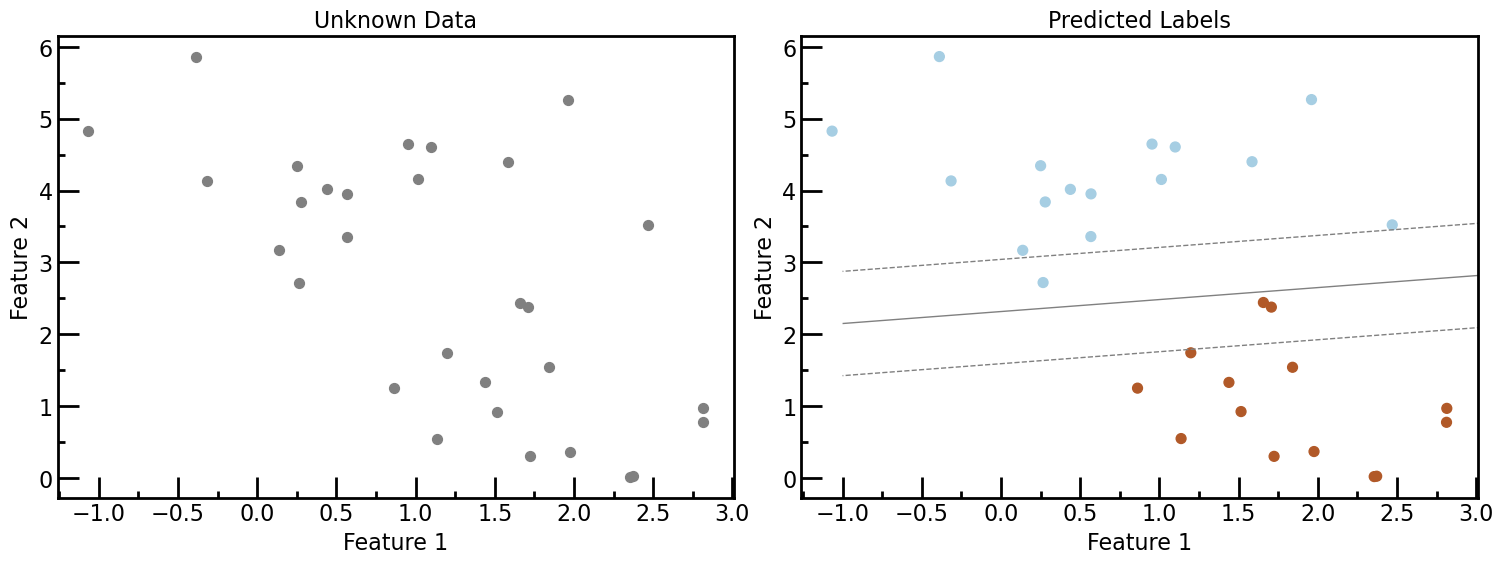

In [192]:
# plot the results
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)


ax[0].scatter(X2[:, 0], X2[:, 1],c='gray',s=50)
ax[0].set_xlabel('Feature 1',fontsize=16)
ax[0].set_ylabel('Feature 2',fontsize=16)
ax[0].tick_params(which='major',direction='in',width=2,length=15,labelsize=16)
ax[0].tick_params(which='minor',direction='in',width=2,length=5,labelsize=16)
ax[0].xaxis.set_minor_locator(AutoMinorLocator(2))
ax[0].yaxis.set_minor_locator(AutoMinorLocator(2))
ax[0].set_title('Unknown Data',fontsize=16)
for axl in ['top','bottom','left','right']:
 ax[0].spines[axl].set_linewidth(2)

xmin, xmax = ax[0].get_xlim()
ymin, ymax = ax[0].get_ylim()
    

ax[1].scatter(X2[:, 0], X2[:, 1], c=y2, **point_style)
ax[1].contour(xy1, xy2, Z, **line_style)
ax[1].set_xlabel('Feature 1',fontsize=16)
ax[1].set_ylabel('Feature 2',fontsize=16)
ax[1].tick_params(which='major',direction='in',width=2,length=15,labelsize=16)
ax[1].tick_params(which='minor',direction='in',width=2,length=5,labelsize=16)
ax[1].xaxis.set_minor_locator(AutoMinorLocator(2))
ax[1].yaxis.set_minor_locator(AutoMinorLocator(2))
ax[1].set_title('Predicted Labels',fontsize=16)
for axl in ['top','bottom','left','right']:
 ax[1].spines[axl].set_linewidth(2)
#ax[1].axis([-1, 4, -2, 7])
ax[1].set_xlim(xmin,xmax)
ax[1].set_ylim(ymin,ymax)



This is the basic idea of a classification task in machine learning, where "classification" indicates that the data has discrete class labels. At first glance this may look fairly trivial: it would be relatively easy to simply look at this data and draw such a discriminatory line to accomplish this classification. A benefit of the machine learning approach, however, is that it can generalize to much larger datasets in many more dimensions.

For example, this is similar to the task of automated spam detection for email; in this case, we might use the following features and labels:

* feature 1, feature 2, etc. -->  normalized counts of important words or phrases ("Your Invoice", "One Neat Trick", etc.)
* label --> "spam"/"not spam" 

For the training set, these labels might be determined by individual inspection of a small representative sample of emails; for the remaining emails, the label would be determined using the model. For a suitably trained classification algorithm with enough well-constructed features (typically thousands or millions of words or phrases), this type of approach can be very effective.

### Supervised Learning: Regression

Now, an example of a simple regression task in which the labels are continuous quantities:

(200, 2) (200,)


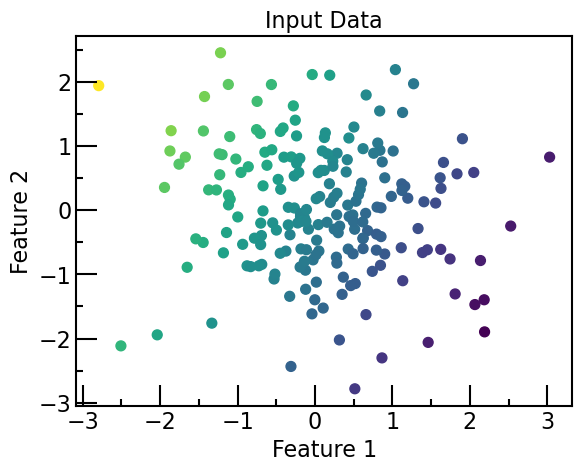

In [193]:
# Create some data for the regression
rng = np.random.RandomState(1)

X = rng.randn(200, 2)
y = np.dot(X, [-2, 1]) + 0.1 * rng.randn(X.shape[0])
#y = np.dot(X, [-2, 1]) + 0.1 * rng.randn(X.shape[0])


print(X.shape,y.shape)
# plot data points
fig, ax = plt.subplots()

points = ax.scatter(X[:, 0], X[:, 1], c=y, s=50,
                    cmap='viridis')
ax.set_xlabel('Feature 1',fontsize=16)
ax.set_ylabel('Feature 2',fontsize=16)
ax.tick_params(which='major',direction='in',width=1.5,length=15,labelsize=16)
ax.tick_params(which='minor',direction='in',width=1.5,length=5,labelsize=16)
ax.xaxis.set_minor_locator(AutoMinorLocator(2))
ax.yaxis.set_minor_locator(AutoMinorLocator(2))
ax.set_title(title,fontsize=16)
for axl in ['top','bottom','left','right']:
 ax.spines[axl].set_linewidth(1.5)
    

As with the classification example, we have two-dimensional data: that is, there are two features describing each data point. The color of each point represents the continuous label for that point.

There are a number of possible regression models we might use for this type of data, but here we will use a simple linear regression to predict the points. This simple linear regression model assumes that if we treat the label as a third spatial dimension, we can fit a plane to the data. This is a higher-level generalization of the well-known problem of fitting a line to data with two coordinates.

We can visualize this setup as shown in the following figure:

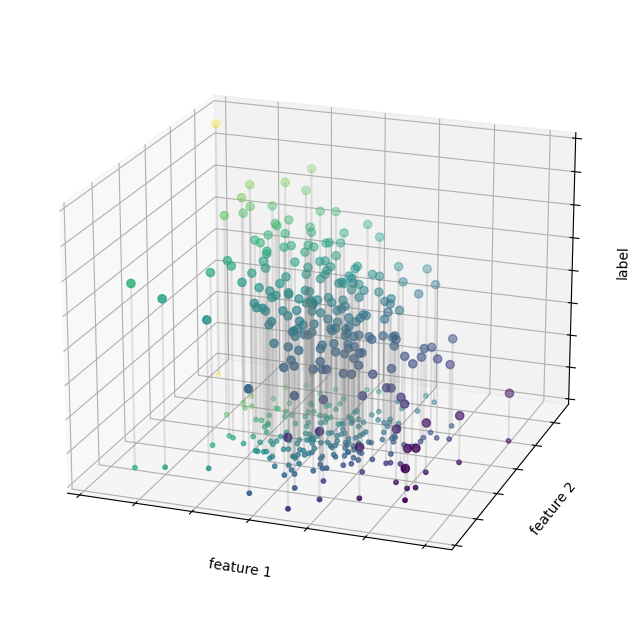

In [194]:
from mpl_toolkits.mplot3d.art3d import Line3DCollection

points = np.hstack([X, y[:, None]]).reshape(-1, 1, 3)
segments = np.hstack([points, points])
segments[:, 0, 2] = -8

# plot points in 3D
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], y, c=y, s=35,
           cmap='viridis')
ax.add_collection3d(Line3DCollection(segments, colors='gray', alpha=0.2))
ax.scatter(X[:, 0], X[:, 1], -8 + np.zeros(X.shape[0]), c=y, s=10,
           cmap='viridis')

# format plot
ax.patch.set_facecolor('white')
ax.view_init(elev=20, azim=-70)
ax.set_zlim3d(-8, 8)
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.yaxis.set_major_formatter(plt.NullFormatter())
ax.zaxis.set_major_formatter(plt.NullFormatter())
ax.set(xlabel='feature 1', ylabel='feature 2', zlabel='label');
#ax.set_axis_off()

# Hide axes (is there a better way?)
#ax.w_xaxis.line.set_visible(False)
#ax.w_yaxis.line.set_visible(False)
#ax.w_zaxis.line.set_visible(False)
#for tick in ax.w_xaxis.get_ticklines():
#    tick.set_visible(False)
#for tick in ax.w_yaxis.get_ticklines():
#    tick.set_visible(False)
#for tick in ax.w_zaxis.get_ticklines():
#    tick.set_visible(False)

The feature 1-feature 2 plane here is the same as in the two-dimensional plot from before; in this case, however, we have represented the labels by both color and three-dimensional axis position. From this view, it seems reasonable that fitting a plane through this three-dimensional data would allow us to predict the expected label for any set of input parameters. 

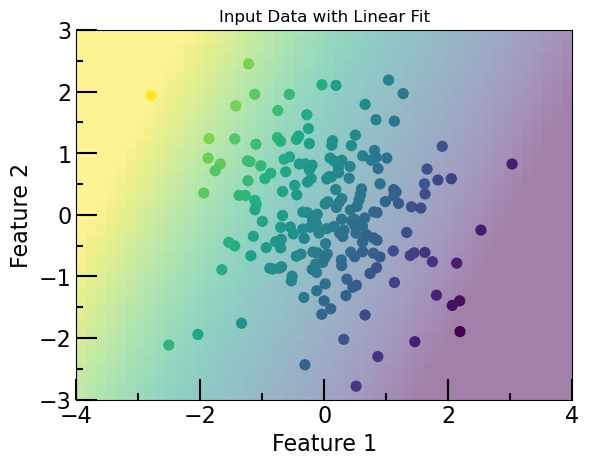

In [195]:
from sklearn.linear_model import LinearRegression

# fit the regression model
model = LinearRegression()
model.fit(X, y)

from matplotlib.collections import LineCollection

# plot data points
fig, ax = plt.subplots()
pts = ax.scatter(X[:, 0], X[:, 1], c=y, s=50,
                 cmap='viridis', zorder=2)

# compute and plot model color mesh
xx, yy = np.meshgrid(np.linspace(-4, 4),
                     np.linspace(-3, 3))
Xfit = np.vstack([xx.ravel(), yy.ravel()]).T
yfit = model.predict(Xfit)
zz = yfit.reshape(xx.shape)

#print('the shapes',xx.shape,Xfit.shape,zz.shape)
ax.pcolorfast([-4, 4], [-3, 3], zz, alpha=0.5,
              cmap='viridis', norm=pts.norm, zorder=1)

ax.set_xlabel('Feature 1',fontsize=16)
ax.set_ylabel('Feature 2',fontsize=16)
ax.set_title('Input Data with Linear Fit')
ax.tick_params(which='major',direction='in',width=1.5,length=15,labelsize=16)
ax.tick_params(which='minor',direction='in',width=1.5,length=5,labelsize=16)
ax.xaxis.set_minor_locator(AutoMinorLocator(2))
ax.yaxis.set_minor_locator(AutoMinorLocator(2))

xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()

Now we have "trained" the model on these data, let's use the model to "predict" the (continuous) labels of new data

In [196]:
# create some new points to predict
X2 = rng.randn(100, 2)

# predict the labels from the Linear Regression model
y2 = model.predict(X2)

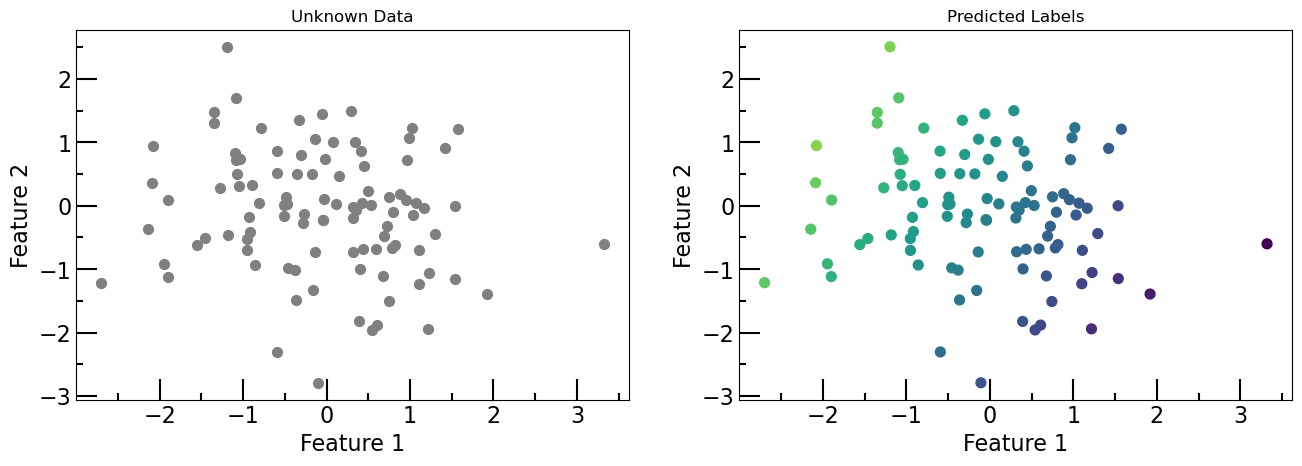

In [197]:
# plot the model fit
fig, ax = plt.subplots(1, 2, figsize=(12.8, 4.8))
fig.subplots_adjust(left=0., right=0.95, wspace=0.2)

ax[0].scatter(X2[:, 0], X2[:, 1], c='gray', s=50)
#ax[0].axis([-4, 4, -3, 3])

ax[1].scatter(X2[:, 0], X2[:, 1], c=y2, s=50,
              cmap='viridis', norm=pts.norm)
thetitle=['Unknown Data','Predicted Labels']
for i,axx in enumerate(ax):
 axx.set_xlabel('Feature 1',fontsize=16)
 axx.set_ylabel('Feature 2',fontsize=16)
 axx.set_title(thetitle[i])
 axx.tick_params(which='major',direction='in',width=1.5,length=15,labelsize=16)
 axx.tick_params(which='minor',direction='in',width=1.5,length=5,labelsize=16)
 axx.xaxis.set_minor_locator(AutoMinorLocator(2))
 axx.yaxis.set_minor_locator(AutoMinorLocator(2))
    

We can compare this again with our training model results ...

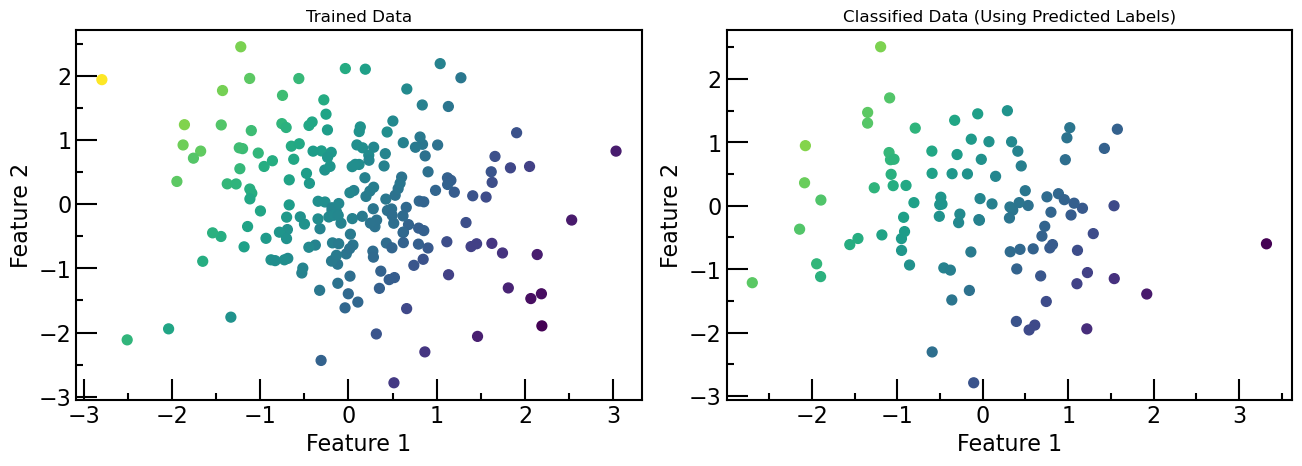

In [198]:
fig, ax = plt.subplots(1, 2, figsize=(12.8, 4.8))
fig.subplots_adjust(left=0., right=0.95, wspace=0.15)

#ax[0].scatter(X2[:, 0], X2[:, 1], c='gray', s=50)
ax[0].scatter(X[:, 0], X[:, 1], c=y, s=50,
                    cmap='viridis')
#ax[0].axis([-4, 4, -3, 3])

ax[1].scatter(X2[:, 0], X2[:, 1], c=y2, s=50,
              cmap='viridis', norm=pts.norm)
thetitle=['Trained Data','Classified Data (Using Predicted Labels)']
for i,axx in enumerate(ax):
 axx.set_xlabel('Feature 1',fontsize=16)
 axx.set_ylabel('Feature 2',fontsize=16)
 axx.set_title(thetitle[i])
 axx.tick_params(which='major',direction='in',width=1.5,length=15,labelsize=16)
 axx.tick_params(which='minor',direction='in',width=1.5,length=5,labelsize=16)
 axx.xaxis.set_minor_locator(AutoMinorLocator(2))
 axx.yaxis.set_minor_locator(AutoMinorLocator(2))
 for axl in ['top','bottom','left','right']:
  axx.spines[axl].set_linewidth(1.5)   

### Unsupervised Learning: Clustering

The classification and regression illustrations we just looked at are examples of supervised learning algorithms, in which we are trying to build a model that will predict labels for new data. Unsupervised learning involves models that describe data without reference to any known labels.

One common case of unsupervised learning is "clustering," in which data is automatically assigned to some number of discrete groups. For example, we might have some two-dimensional data like that shown in the following figure:

In [199]:
# create 50 separable points
X, y = make_blobs(n_samples=100, centers=4,
                  random_state=42, cluster_std=1.5)

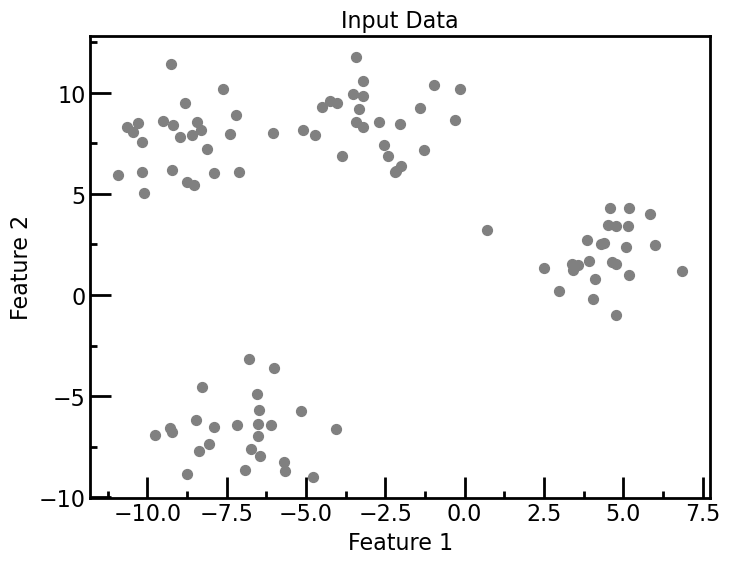

In [200]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(X[:, 0], X[:, 1], s=50, color='gray')
ax.set_xlabel('Feature 1',fontsize=16)
ax.set_ylabel('Feature 2',fontsize=16)
ax.tick_params(which='major',direction='in',width=2,length=15,labelsize=16)
ax.tick_params(which='minor',direction='in',width=2,length=5,labelsize=16)
ax.xaxis.set_minor_locator(AutoMinorLocator(2))
ax.yaxis.set_minor_locator(AutoMinorLocator(2))
ax.set_title(title,fontsize=16)
for axl in ['top','bottom','left','right']:
 ax.spines[axl].set_linewidth(2)
    

it is clear that each of these points is part of a distinct group. Given this input, a clustering model will use the intrinsic structure of the data to determine which points are related.  Now I'm going to use a clustering algorithm called a _k-means_ algorithm to find and classify these clusters ...

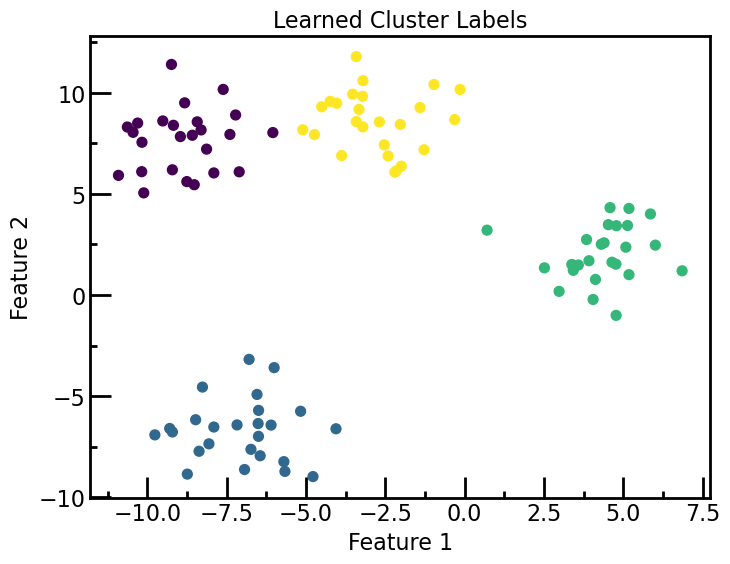

In [202]:
from sklearn.cluster import KMeans

# Fit the K Means model
#model = KMeans(4, random_state=0)
model = KMeans(n_clusters=4, random_state=0)
y = model.fit_predict(X)

# plot the data with cluster labels
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(X[:, 0], X[:, 1], s=50, c=y, cmap='viridis')
ax.set_xlabel('Feature 1',fontsize=16)
ax.set_ylabel('Feature 2',fontsize=16)
ax.tick_params(which='major',direction='in',width=2,length=15,labelsize=16)
ax.tick_params(which='minor',direction='in',width=2,length=5,labelsize=16)
ax.xaxis.set_minor_locator(AutoMinorLocator(2))
ax.yaxis.set_minor_locator(AutoMinorLocator(2))
ax.set_title('Learned Cluster Labels',fontsize=16)
for axl in ['top','bottom','left','right']:
 ax.spines[axl].set_linewidth(2)

k-means fits a model consisting of k cluster centers; the optimal centers are assumed to be those that minimize the distance of each point from its assigned center. Again, this might seem like a trivial exercise in two dimensions, but as our data becomes larger and more complex, such clustering algorithms can be employed to extract useful information from the dataset.

### Unsupervised Learning: Dimensionality Reduction

Dimensionality reduction is another example of an unsupervised algorithm, in which labels or other information are inferred from the structure of the dataset itself. Dimensionality reduction is a bit more abstract than the examples we looked at before, but generally it seeks to pull out some low-dimensional representation of data that in some way preserves relevant qualities of the full dataset. Different dimensionality reduction routines measure these relevant qualities in different ways

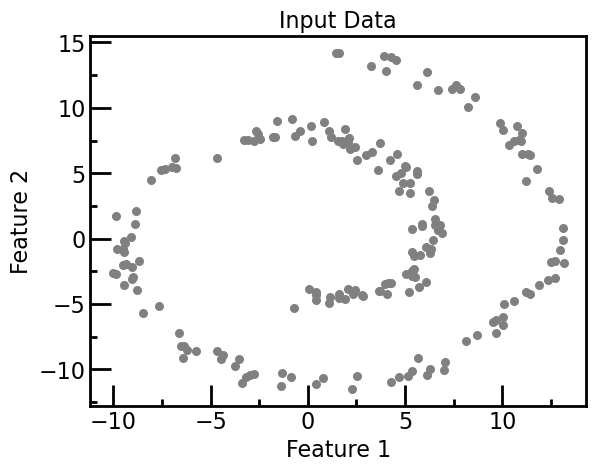

In [182]:
#makes a crazy shape
from sklearn.datasets import make_swiss_roll

# make data
X, y = make_swiss_roll(200, noise=0.5, random_state=42)
X = X[:, [0, 2]]

# visualize data
fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1], color='gray', s=30)
ax.set_xlabel('Feature 1',fontsize=16)
ax.set_ylabel('Feature 2',fontsize=16)
ax.tick_params(which='major',direction='in',width=2,length=15,labelsize=16)
ax.tick_params(which='minor',direction='in',width=2,length=5,labelsize=16)
ax.xaxis.set_minor_locator(AutoMinorLocator(2))
ax.yaxis.set_minor_locator(AutoMinorLocator(2))
ax.set_title('Input Data',fontsize=16)
for axl in ['top','bottom','left','right']:
 ax.spines[axl].set_linewidth(2)



Visually, it is clear that there is some structure in this data: it is drawn from a one-dimensional line that is arranged in a spiral within this two-dimensional space. In a sense, you could say that this data is "intrinsically" only one dimensional, though this one-dimensional data is embedded in higher-dimensional space. A suitable dimensionality reduction model in this case would be sensitive to this nonlinear embedded structure, and be able to pull out this lower-dimensionality representation.

The following figure shows a visualization of the results of the Isomap algorithm, a manifold learning algorithm that does exactly this:


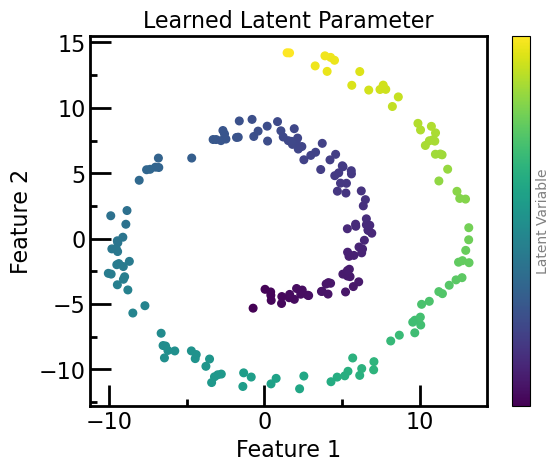

In [183]:
from sklearn.manifold import Isomap

model = Isomap(n_neighbors=8, n_components=1)
y_fit = model.fit_transform(X).ravel()

# visualize data
fig, ax = plt.subplots()
pts = ax.scatter(X[:, 0], X[:, 1], c=y_fit, cmap='viridis', s=30)
cb = fig.colorbar(pts, ax=ax)

# format the plot
#format_plot(ax, 'Learned Latent Parameter')
cb.set_ticks([])
cb.set_label('Latent Variable', color='gray')

ax.set_xlabel('Feature 1',fontsize=16)
ax.set_ylabel('Feature 2',fontsize=16)
ax.tick_params(which='major',direction='in',width=2,length=15,labelsize=16)
ax.tick_params(which='minor',direction='in',width=2,length=5,labelsize=16)
ax.xaxis.set_minor_locator(AutoMinorLocator(2))
ax.yaxis.set_minor_locator(AutoMinorLocator(2))
ax.set_title('Learned Latent Parameter',fontsize=16)
for axl in ['top','bottom','left','right']:
 ax.spines[axl].set_linewidth(2)

Notice that the colors (which represent the extracted one-dimensional latent variable) change uniformly along the spiral:  the algorithm did in fact detect the structure we saw by eye. 

As with the previous examples, the power of dimensionality reduction algorithms becomes clearer in higher-dimensional cases. For example, we might wish to visualize important relationships within a dataset that has 100 or 1,000 features. Visualizing 1,000-dimensional data is a challenge, and one way we can make this more manageable is to use a dimensionality reduction technique to reduce the data to two or three dimensions.

You may be thinking "reducing the dimensionality of data to find key patterns sounds a lot like PCA" ... and you would be right.  In fact principal component analysis is a key dimensionality-reduction algorithm talked about within the context of ML!